<a href="https://colab.research.google.com/github/faizan7078/Fake-News-Classification/blob/main/Fake_News_Classification_Using_NLP_And_ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from sklearn import preprocessing
import re
from wordcloud import WordCloud
import pandas
import string
from nltk.corpus import stopwords
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [23]:
import os
import zipfile
import shutil
import json
import logging
import logging.config
import time

In [28]:
true = pd.read_csv("/content/True.csv (1).zip")
fake = pd.read_csv("/content/Fake.csv (2).zip")

In [29]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [30]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Combining the true and fake news**

In [31]:
true['label']='fake'
fake['label']='true'

data = pd.concat([true, fake], axis=0)

In [32]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",fake


**Selection of the interested columns for feature extraction**

In [33]:
data=data[['text','label']]

In [34]:
data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,fake
1,WASHINGTON (Reuters) - Transgender people will...,fake
2,WASHINGTON (Reuters) - The special counsel inv...,fake
3,WASHINGTON (Reuters) - Trump campaign adviser ...,fake
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,fake


**Count of the datase**t

In [35]:
print('Count of the dataset is: ', len(data))

Count of the dataset is:  44898


In [36]:
data['text']=data['text'].str.lower()

In [37]:
data['text'].head()

0    washington (reuters) - the head of a conservat...
1    washington (reuters) - transgender people will...
2    washington (reuters) - the special counsel inv...
3    washington (reuters) - trump campaign adviser ...
4    seattle/washington (reuters) - president donal...
Name: text, dtype: object

**all columns**

In [38]:
data.columns

Index(['text', 'label'], dtype='object')

In [42]:
data['label'].unique()

array(['fake', 'true'], dtype=object)

In [43]:
#data types of all columns

In [44]:
data.dtypes

text     object
label    object
dtype: object

Checking Null values

In [45]:
data[data.isnull().any(axis=1)]

,text,label


**Count of Null value**

In [39]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

**Data information**

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


**Frequency Distribution of labe**l

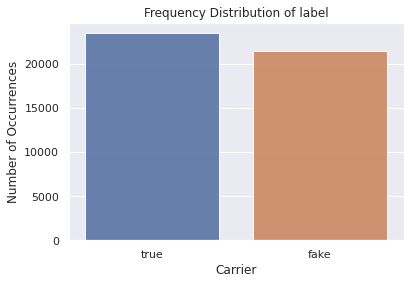

In [41]:
%matplotlib inline
carrier_count = data["label"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

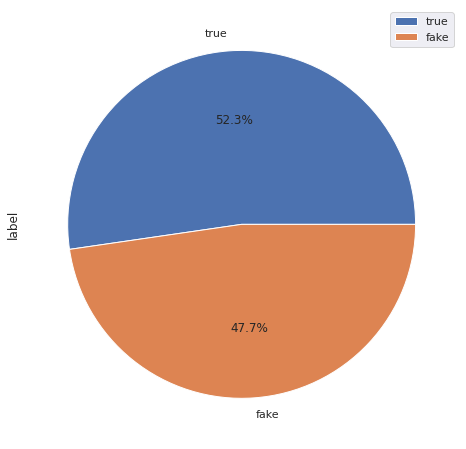

In [46]:
data["label"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [47]:
data["label"].value_counts()

true    23481
fake    21417
Name: label, dtype: int64

**Preproccessing of words**

In [49]:
data.loc[data["text"].str.contains('america'), 'text'] = 'american'
data.loc[data["text"].str.contains('americans'), 'text'] = 'american'
data.loc[data["text"].str.contains('youore'), 'text'] = 'you are'
data.loc[data["text"].str.contains('youre'), 'text'] = 'you are'
data.loc[data["text"].str.contains('years'), 'text'] = 'year'
data.loc[data["text"].str.contains('break'), 'text'] = 'breakingnews'
data.loc[data["text"].str.contains('breaking'), 'text'] = 'breakingnews'
data.loc[data["text"].str.contains('caused'), 'text'] = 'cause'
data.loc[data["text"].str.contains('causes'), 'text'] = 'cause'
data.loc[data["text"].str.contains('county'), 'text'] = 'country'

In [50]:
for letter in '1234567890.(/':
    data["text"] = data["text"].str.replace(letter,'')

In [51]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [52]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

ProcessPost for applying all functions

In [53]:
def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    text = re.sub(r'#([^\s]+)', r'\1', text)

    text= remove_punctuations(text)
    text=remove_repeating_char(text)
    
    return text

Applying processPost function for preprocessing

In [54]:
data["text"] = data["text"].apply(lambda x: processPost(x))

**Getting Tokenization**

In [55]:
tokenizer = RegexpTokenizer(r'\w+')
data["text"] = data["text"].apply(tokenizer.tokenize)

In [56]:
data["text"].head()

0                                               [year]
1                                           [american]
2    [washington, reuters, the, special, counsel, i...
3                                           [american]
4                                           [american]
Name: text, dtype: object

In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
stopwords_list = stopwords.words('english')

In [59]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
len(stopwords_list)

179

In [61]:
data["text"]=data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [62]:
data["text"].head()

0                                               [year]
1                                           [american]
2    [washington, reuters, special, counsel, invest...
3                                           [american]
4                                           [american]
Name: text, dtype: object

In [63]:
all_words = [word for tokens in data["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

3138438 words total, with a vocabulary size of 90312
Max sentence length is 1511


Top 25 words in text



In [64]:
counter = Counter(all_words)

In [65]:
counter.most_common(25)

[('said', 48117),
 ('trump', 38884),
 ('us', 19022),
 ('would', 16518),
 ('president', 16516),
 ('american', 16452),
 ('wil', 15049),
 ('reuters', 14006),
 ('ben', 13175),
 ('year', 11199),
 ('people', 10918),
 ('state', 10817),
 ('one', 10069),
 ('al', 9963),
 ('also', 9383),
 ('house', 9379),
 ('donald', 9334),
 ('new', 9159),
 ('government', 9116),
 ('told', 8619),
 ('clinton', 7738),
 ('could', 7220),
 ('states', 7157),
 ('campaign', 7046),
 ('republican', 7044)]

In [66]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

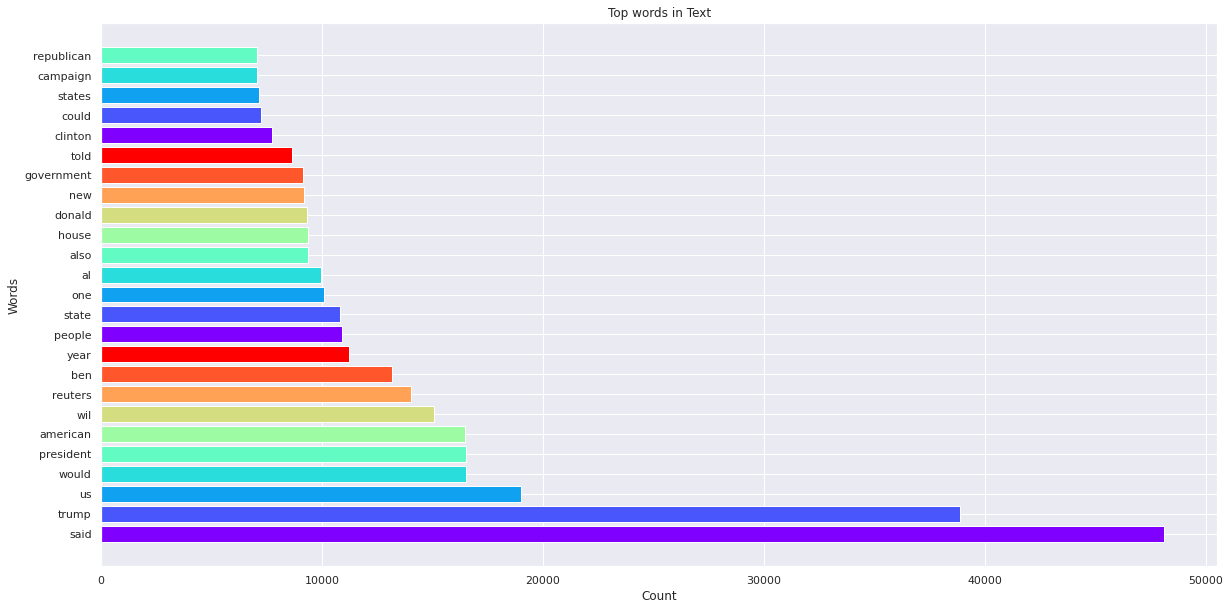

In [67]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)



Word cloud of true news

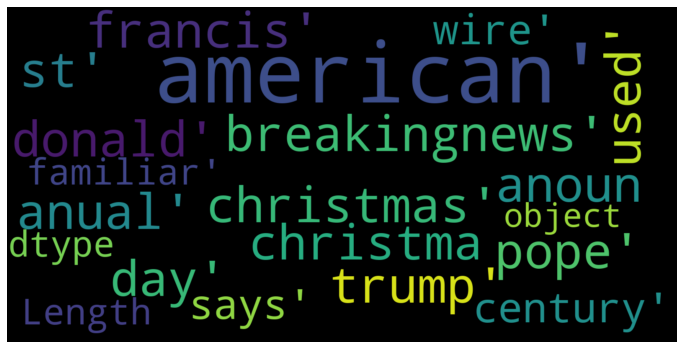

In [68]:
data1=data[data['label']=='true']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word cloud of fake news

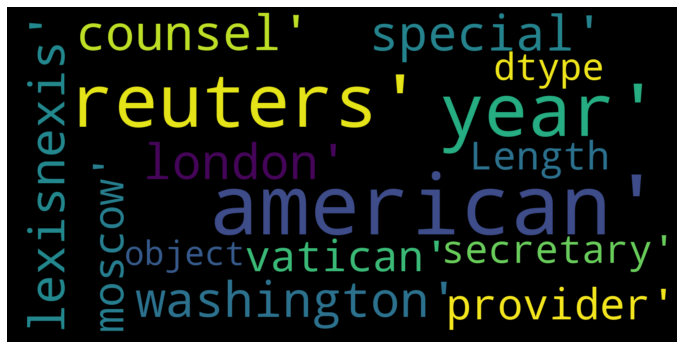

In [69]:
data1=data[data['label']=='fake']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Features Extraction

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

Preparing features for training and testing

In [71]:
unigramdataGet= word_vectorizer.fit_transform(data['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,able,absolutely,acept,aces,acording,acount,acr,acros,act,action,actions,actualy,acusations,acused,ad,aded,ading,administration,adres,adviser,afairs,agencies,agency,agenda,ago,agre,agred,agrement,ahead,aid,air,al,alegations,aleged,alies,alow,alowed,aly,ambasador,american,...,wants,war,warned,washington,watch,water,way,weapons,website,wednesday,wek,wekend,weks,wel,went,west,western,white,wife,wil,win,wire,woman,women,words,work,worked,workers,working,world,wrong,wrote,xi,year,yearold,yemen,yes,york,young,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First 100 words of vocab

In [72]:
vocab[0:100]

['able',
 'absolutely',
 'acept',
 'aces',
 'acording',
 'acount',
 'acr',
 'acros',
 'act',
 'action',
 'actions',
 'actualy',
 'acusations',
 'acused',
 'ad',
 'aded',
 'ading',
 'administration',
 'adres',
 'adviser',
 'afairs',
 'agencies',
 'agency',
 'agenda',
 'ago',
 'agre',
 'agred',
 'agrement',
 'ahead',
 'aid',
 'air',
 'al',
 'alegations',
 'aleged',
 'alies',
 'alow',
 'alowed',
 'aly',
 'ambasador',
 'american',
 'ankara',
 'anounced',
 'anouncement',
 'answer',
 'aparently',
 'apeared',
 'apears',
 'april',
 'aproved',
 'arab',
 'arabia',
 'area',
 'areas',
 'arest',
 'arested',
 'armed',
 'army',
 'article',
 'asault',
 'ask',
 'asked',
 'asking',
 'atack',
 'atacks',
 'atempt',
 'atorney',
 'august',
 'authorities',
 'authority',
 'avoid',
 'away',
 'backed',
 'bad',
 'balistic',
 'ban',
 'bangladesh',
 'bank',
 'barack',
 'base',
 'based',
 'began',
 'behavior',
 'beijing',
 'believe',
 'believed',
 'ben',
 'berlin',
 'bernie',
 'best',
 'beter',
 'betwen',
 'big',
 

In [73]:
print('Vocab Lenght ', len(vocab))


Vocab Lenght  1000


In [74]:
len(unigramdata)




44898

In [75]:
data.reset_index(drop=True, inplace=True)
data=data.drop(columns=['text'])

Feature selection from the extracted features of unigram

In [76]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, data['label'])

unigramdata = selector.transform(unigramdata)
print(unigramdata.shape)

(44898, 700)


In [77]:
X=unigramdata
y=data['label']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

SVM Support Vector Machine Algorithm

In [79]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Accuracy

In [80]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.80


Precision, Recall, F1

In [81]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.79      0.80     13470
weighted avg       0.81      0.80      0.80     13470





Confusion Matrix



confusion matrix


[[4525 1889]
 [ 818 6238]]




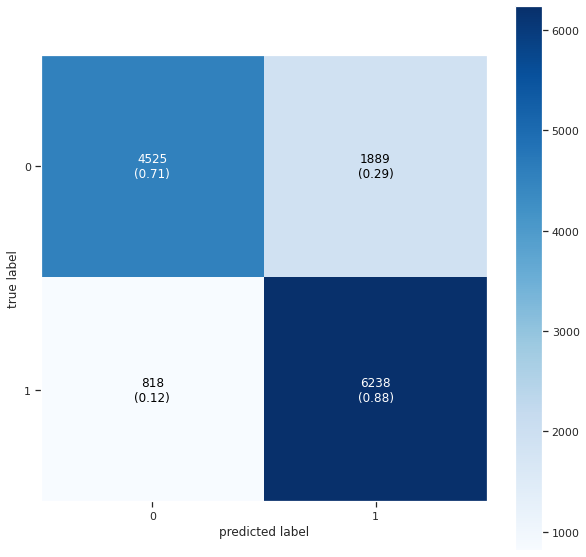

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Naive Bayes Algorithm

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(priors=None, var_smoothing=1e-08)

Accuracy

In [84]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.73


Precision, Recall, F1

In [85]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.53      0.65      6414
        true       0.68      0.92      0.78      7056

    accuracy                           0.73     13470
   macro avg       0.77      0.72      0.72     13470
weighted avg       0.76      0.73      0.72     13470





Confusion Matrix



confusion matrix


[[3376 3038]
 [ 578 6478]]




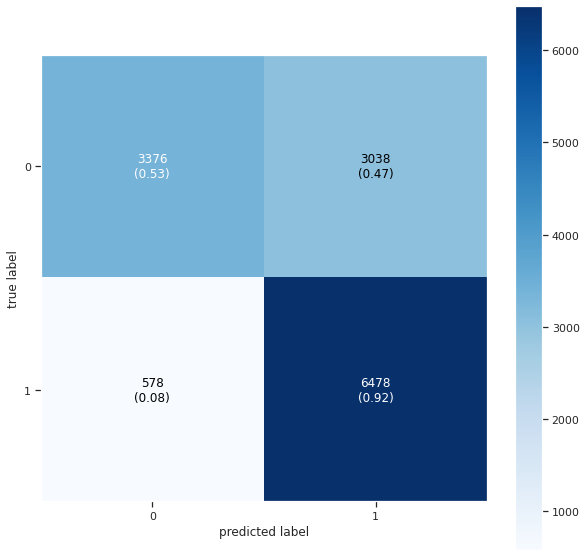

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Logistic Regression Algorithm

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy

In [88]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.80


Precision, Recall, F1

In [89]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.85      0.71      0.77      6414
        true       0.77      0.88      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.81      0.80      0.80     13470
weighted avg       0.81      0.80      0.80     13470





Confusion Metrix



confusion matrix


[[4533 1881]
 [ 816 6240]]




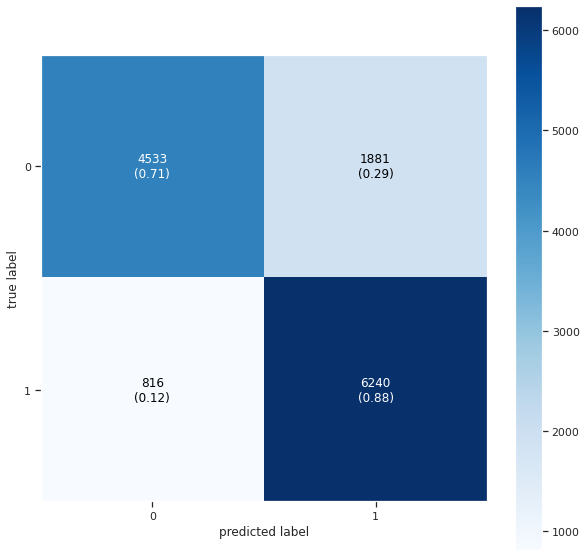

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Random Forest Algorithm

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

Accuracy

In [92]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.79


Precision, Recall, F1

In [93]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.84      0.69      0.76      6414
        true       0.76      0.88      0.82      7056

    accuracy                           0.79     13470
   macro avg       0.80      0.79      0.79     13470
weighted avg       0.80      0.79      0.79     13470





Confusion MATRIX



confusion matrix


[[4440 1974]
 [ 828 6228]]




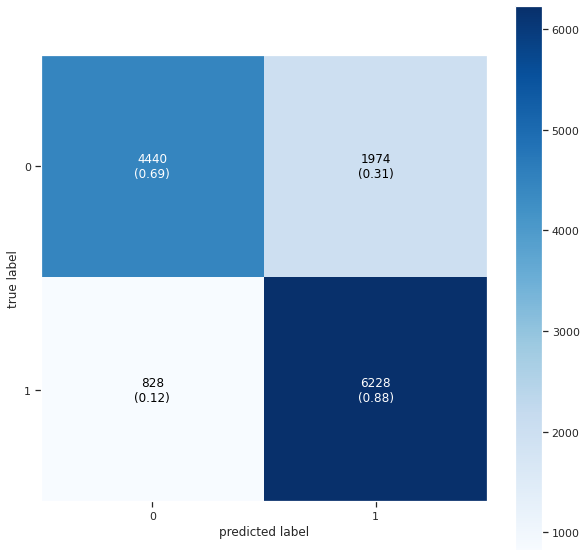

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()




Ensemble Technique to combine all algorithms and making one

In [95]:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)


In [96]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM',
                              LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=500,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('NB',
                              GaussianNB(priors=None, var_smoothing=1e-08)),
                             ('Log',
                              LogisticRegression(C=2, class_weight=None,
                                                 dual=False, fit_intercept=Tru...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
               

Accuracy

In [97]:

y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.80


Precision, Recall, F1

In [98]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.84      0.71      0.77      6414
        true       0.77      0.87      0.82      7056

    accuracy                           0.80     13470
   macro avg       0.80      0.79      0.79     13470
weighted avg       0.80      0.80      0.80     13470





Confusion Matrix¶



confusion matrix


[[4582 1832]
 [ 900 6156]]




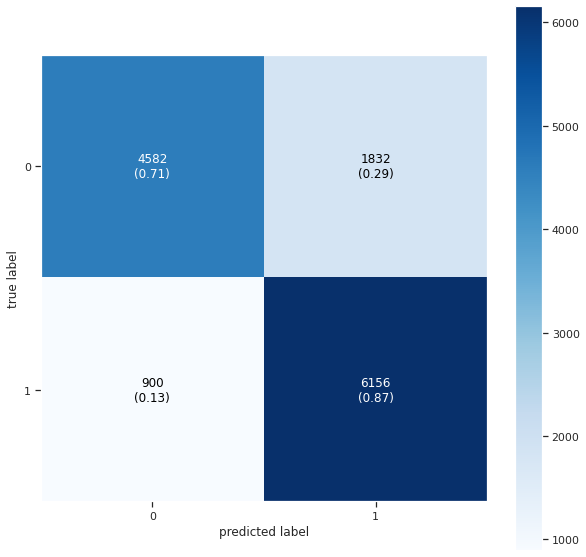

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Comparison of all algorithms Results

In [100]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])
x.add_row(["Ensemble Modelling", round(en,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.8    |
|    Naive Bayes Algorithm     |   0.73   |
| LogisticRegression Algorithm |   0.8    |
|   Random Forest Algorithm    |   0.79   |
|      Ensemble Modelling      |   0.8    |
+------------------------------+----------+


